
Code References:
1)NLTK prepocessing:
https://www.nltk.org/
2)sklearn feature extraction
https://scikit-learn.org/stable/modules/feature_extraction.html
3)sklearn naive bayes classifier
https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html
4)Logistic Regression:
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

5)Scikit Plot
https://scikit-plot.readthedocs.io/en/stable/Quickstart.html




In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None 

nlp_data=pd.read_csv('/content/drive/Shareddrives/NLP_project_materials/complaints.csv')

In [ ]:
nlp_data.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2019-06-13,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,CAPITAL ONE FINANCIAL CORPORATION,PA,186XX,NaN,Consent not provided,Web,2019-06-13,Closed with explanation,Yes,NaN,3274605
1,2019-11-01,Vehicle loan or lease,Loan,Struggling to pay your loan,Denied request to lower payments,I contacted Ally on Friday XX/XX/XXXX after fa...,Company has responded to the consumer and the ...,ALLY FINANCIAL INC.,NJ,088XX,NaN,Consent provided,Web,2019-11-01,Closed with explanation,Yes,NaN,3425257
2,2019-04-01,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account status incorrect,NaN,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",PA,19067,NaN,Consent not provided,Web,2019-04-01,Closed with explanation,Yes,NaN,3198225
3,2021-10-06,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Was not notified of investigation status or re...,NaN,NaN,"EQUIFAX, INC.",MD,21207,NaN,NaN,Web,2021-10-06,In progress,Yes,NaN,4783820
4,2019-08-08,Mortgage,Conventional home mortgage,Trouble during payment process,NaN,NaN,Company has responded to the consumer and the ...,"FLAGSTAR BANK, FSB",ID,83706,NaN,NaN,Referral,2019-08-15,Closed with explanation,Yes,NaN,3342290


In [ ]:
import datetime as dt

nlp_data['Date received'] = pd.to_datetime(nlp_data['Date received'], format='%Y-%m-%d')
nlp_data_filter = nlp_data.loc[(nlp_data['Date received'] >= '2020-01-01')]
nlp_data_filter.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
3,2021-10-06,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Was not notified of investigation status or re...,NaN,NaN,"EQUIFAX, INC.",MD,21207,NaN,NaN,Web,2021-10-06,In progress,Yes,NaN,4783820
6,2020-06-10,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Credit inquiries on your report that you don't...,I am a victim of Identity Theft & currently ha...,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,MT,NaN,Servicemember,Consent provided,Web,2020-06-10,Closed with explanation,Yes,NaN,3692762
7,2021-09-30,Credit card or prepaid card,General-purpose credit card or charge card,Problem with a purchase shown on your statement,Credit card company isn't resolving a dispute ...,NaN,NaN,CAPITAL ONE FINANCIAL CORPORATION,CO,80504,NaN,NaN,Web,2021-09-30,Closed with explanation,Yes,NaN,4768293
8,2021-10-06,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Was not notified of investigation status or re...,NaN,NaN,"EQUIFAX, INC.",AL,36502,NaN,NaN,Web,2021-10-06,In progress,Yes,NaN,4783868
23,2021-09-14,Mortgage,Conventional home mortgage,Trouble during payment process,NaN,NaN,NaN,Home Point Financial Corporation,CA,918XX,"Older American, Servicemember",NaN,Web,2021-09-30,Closed with explanation,Yes,NaN,4719600


In [ ]:
lab=nlp_data_filter['Product'].unique().tolist()
lab

['Credit reporting, credit repair services, or other personal consumer reports',
 'Credit card or prepaid card',
 'Mortgage',
 'Debt collection',
 'Checking or savings account',
 'Student loan',
 'Vehicle loan or lease',
 'Money transfer, virtual currency, or money service',
 'Payday loan, title loan, or personal loan']

In [ ]:
re_dict={'Credit reporting, credit repair services, or other personal consumer reports':'Credit reporting',
'Money transfer, virtual currency, or money service':'retail_banking',
'Payday loan, title loan, or personal loan':'mortgages_and_loans',
'Student loan':'mortgages_and_loans',
'Checking or savings account':'retail_banking',
'Mortgage':'mortgages_and_loans',
'Vehicle loan or lease':'mortgages_and_loans',
'Credit card or prepaid card':'credit_card',
'Debt collection':'debt_collection'}
nlp_data_filter['Product'].replace(re_dict,inplace=True)
nlp_data_filter.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
3,2021-10-06,Credit reporting,Credit reporting,Problem with a credit reporting company's inve...,Was not notified of investigation status or re...,NaN,NaN,"EQUIFAX, INC.",MD,21207,NaN,NaN,Web,2021-10-06,In progress,Yes,NaN,4783820
6,2020-06-10,Credit reporting,Credit reporting,Improper use of your report,Credit inquiries on your report that you don't...,I am a victim of Identity Theft & currently ha...,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,MT,NaN,Servicemember,Consent provided,Web,2020-06-10,Closed with explanation,Yes,NaN,3692762
7,2021-09-30,credit_card,General-purpose credit card or charge card,Problem with a purchase shown on your statement,Credit card company isn't resolving a dispute ...,NaN,NaN,CAPITAL ONE FINANCIAL CORPORATION,CO,80504,NaN,NaN,Web,2021-09-30,Closed with explanation,Yes,NaN,4768293
8,2021-10-06,Credit reporting,Credit reporting,Problem with a credit reporting company's inve...,Was not notified of investigation status or re...,NaN,NaN,"EQUIFAX, INC.",AL,36502,NaN,NaN,Web,2021-10-06,In progress,Yes,NaN,4783868
23,2021-09-14,mortgages_and_loans,Conventional home mortgage,Trouble during payment process,NaN,NaN,NaN,Home Point Financial Corporation,CA,918XX,"Older American, Servicemember",NaN,Web,2021-09-30,Closed with explanation,Yes,NaN,4719600


In [ ]:
nlp_data_filter['Product'].unique()

array(['Credit reporting', 'credit_card', 'mortgages_and_loans',
       'debt_collection', 'retail_banking'], dtype=object)

In [ ]:
nlp_data_filter.drop(['Date received', 'Issue','Company public response','Company public response','Company','State','ZIP code','Tags','Consumer consent provided?','Submitted via','Date sent to company','Company response to consumer','Submitted via','Date sent to company','Company response to consumer','Timely response?','Consumer disputed?','Complaint ID','Sub-product','Sub-issue'], axis=1, inplace=True)

In [ ]:
nlp_data_filter.dropna(subset = ['Consumer complaint narrative'], inplace=True)
nlp_data_filter.head()

,Product,Consumer complaint narrative
6,Credit reporting,I am a victim of Identity Theft & currently ha...
40,Credit reporting,"On XX/XX/2020, in the amount of {$1500.00} to ..."
77,debt_collection,I received a collections notice dated XX/XX/XX...
107,debt_collection,"On XX/XX/2020, I emailed the following to XXXX..."
130,Credit reporting,ATTN Collections Dept I am submitting a compla...


In [ ]:
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords
from nltk import *

nltk.download('stopwords') 
stop_word_removal = stopwords.words('english')  
nlp_data_filter['Consumer complaint narrative'] = nlp_data_filter['Consumer complaint narrative'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_word_removal))
nlp_data_filter['Consumer complaint narrative'] = nlp_data_filter['Consumer complaint narrative'].apply(lambda x: re.sub('[!@#$:).;,?&]', '', x.lower()))
nlp_data_filter['Consumer complaint narrative'] = nlp_data_filter['Consumer complaint narrative'].apply(lambda x: re.sub(' ', ' ', x))
nlp_data_filter['Consumer complaint narrative'] = nlp_data_filter['Consumer complaint narrative'].apply(lambda x: re.sub('XX','', x))
nlp_data_filter['Consumer complaint narrative'] = nlp_data_filter['Consumer complaint narrative'].apply(lambda x: re.sub("n't", " not ", x))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from sklearn import naive_bayes
# Define a pipeline combining a text feature extractor with multi lable classifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
from sklearn.feature_extraction import text

nlp_data_filter['Product']=le.fit_transform(nlp_data_filter['Product'])

X = nlp_data_filter['Consumer complaint narrative']
y = nlp_data_filter['Product']

X_train, X_test, y_train, y_test=  train_test_split(X,y, test_size=0.20, random_state=42)


vectorizer = text.CountVectorizer(stop_words=stop_word_removal).fit(X)
TfidF = text.TfidfTransformer()
X = TfidF.fit_transform(vectorizer.transform(X_train))
Xt = TfidF.transform(vectorizer.transform(X_test))

#vectorizer.vocabulary_


In [ ]:
NB_model=MultinomialNB()
NB_model.fit(X, y_train)

MultinomialNB()

In [ ]:
y_pred = NB_model.predict(Xt)

In [ ]:
print("Achieved accuracy: %0.3f" %
      accuracy_score(y_test, y_pred))

Achieved accuracy: 0.808


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.96      0.87     33442
           1       0.84      0.50      0.62      5513
           2       0.86      0.47      0.61      9540
           3       0.83      0.79      0.81      7287
           4       0.87      0.77      0.82      5518

    accuracy                           0.81     61300
   macro avg       0.84      0.70      0.75     61300
weighted avg       0.82      0.81      0.79     61300



In [ ]:
Logistic_reg_model=LogisticRegression(solver='lbfgs', max_iter=10000)
Logistic_reg_model.fit(X, y_train)
log_y_pred = Logistic_reg_model.predict(Xt)

In [ ]:
print("Achieved accuracy: %0.3f" %
      accuracy_score(y_test, log_y_pred))
print(classification_report(y_test, log_y_pred))

Achieved accuracy: 0.875
              precision    recall  f1-score   support

           0       0.90      0.93      0.92     33442
           1       0.80      0.76      0.78      5513
           2       0.83      0.75      0.79      9540
           3       0.86      0.84      0.85      7287
           4       0.87      0.89      0.88      5518

    accuracy                           0.88     61300
   macro avg       0.85      0.84      0.84     61300
weighted avg       0.87      0.88      0.87     61300



In [ ]:
!pip install scikit-plot

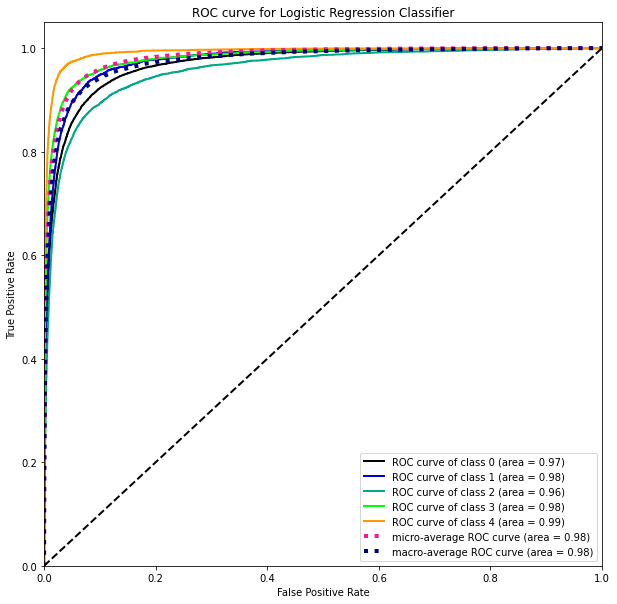

In [ ]:
import scikitplot as skplt
import matplotlib.pyplot as plt

y_probas_log = Logistic_reg_model.predict_proba(Xt)
skplt.metrics.plot_roc(y_test, y_probas_log,figsize=(10,10))
plt.title('ROC curve for Logistic Regression Classifier')
plt.show()

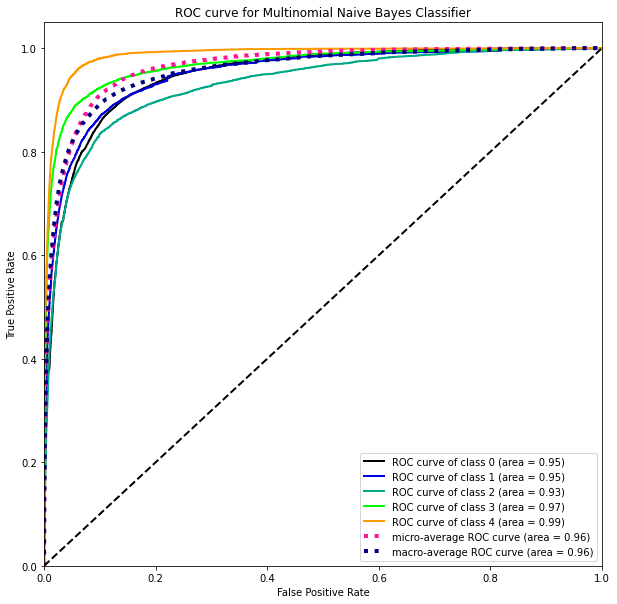

In [ ]:


y_probas = NB_model.predict_proba(Xt)
skplt.metrics.plot_roc(y_test, y_probas,figsize=(10,10))
plt.title('ROC curve for Multinomial Naive Bayes Classifier')
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
NB_accy=accuracy_score(y_test, y_pred)
NB_Recall=recall_score(y_test, y_pred,average='micro')
NB_Precision=precision_score(y_test, y_pred,average='micro')
NB_f1=f1_score(y_test, y_pred,average='micro')

LR_accy=accuracy_score(y_test, log_y_pred)
LR_Recall=recall_score(y_test, log_y_pred,average='micro')
LR_Precision=precision_score(y_test, log_y_pred,average='micro')
LR_f1=f1_score(y_test, log_y_pred,average='micro')

In [ ]:
from prettytable import PrettyTable
myTable = PrettyTable(["Model", "Accuracy", "Precision", "Recall","F1"])
myTable.add_row(["Multinomial Naive Bayes", NB_accy, NB_Precision, NB_Recall,NB_f1])
myTable.add_row(["Logistic Regression",LR_accy,LR_Precision,LR_Recall,LR_f1])
print(myTable)

+-------------------------+--------------------+--------------------+--------------------+--------------------+
|          Model          |      Accuracy      |     Precision      |       Recall       |         F1         |
+-------------------------+--------------------+--------------------+--------------------+--------------------+
| Multinomial Naive Bayes | 0.8076019575856443 | 0.8076019575856443 | 0.8076019575856443 | 0.8076019575856443 |
|   Logistic Regression   | 0.8752039151712887 | 0.8752039151712887 | 0.8752039151712887 | 0.8752039151712887 |
+-------------------------+--------------------+--------------------+--------------------+--------------------+
